In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
# 读取数据,返回X和Y
def load_housing_data():
    file = open("Housing.txt", 'r')
    labels = np.zeros((506, 1), dtype=np.float32)
    data = np.zeros((506, 13), dtype=np.float32)
    for i, line in enumerate(file):
        line = line.strip('\n').split()
        labels[i] = float(line[0])
        for j in range(13):
            data[i,j] = float(line[j+1].split(":")[1])
    data = np.array(data)
    labels = np.array(labels)
    return data, labels



            

In [22]:
# 训练模型,返回损失和模型参数
def train(x_train, y_train, x_test, y_test, num_train, learning_rate):
    w = np.zeros((1, len(x_train[0])), dtype=np.float32)
    b = 0.0
    train_loss = []
    test_loss = []
    for epoch in range(num_train):
        loss = 0
        for i in range(len(x_train)):
            x = x_train[i]
            y = y_train[i]
            h = w.dot(x) + b
            
            loss += (y - h) ** 2
            w = w - learning_rate * (h - y) * x
            b = b - learning_rate * (h - y) 
        train_loss.append(loss / len(x_train))
        test_loss.append(test(x_train, y_train, w, b))
    return train_loss, test_loss, w, b

In [23]:
# 计算并返回测试集损失值
def test(X, Y, w, b):
    loss = 0
    for i in range(len(X)):
        x = X[i]
        y = Y[i]
        h = w.dot(x) + b
        loss += (y - h) ** 2
    return loss / len(X)


In [24]:
# 根据模型计算房价预测值
def predict(X, w, b):
    H = []
    for i in range(len(X)):
        H.append(w.dot(X[i]) + b)
    return H


In [35]:
# 绘制损失函数
def plot_loss(train_loss, test_loss):
    plt.figure( )
    plt.title("Loss Function")
    plt.plot(range(len(train_loss)), train_loss, c='blue', linestyle=':', label='train')
    plt.plot(range(len(test_loss)), test_loss, c='red', label='test')
    plt.legend()
    plt.show()
    
    

In [36]:
# 绘制房价预测图
def plot_price(y_predict, y_true):
    plt.figure(  )
    plt.title('Model Fitting')
    plt.plot(range(len(y_true)), y_true, c='blue', label='real')
    plt.plot(range(len(y_true)), y_predict, c='red', linestyle=':', label='predict')
    plt.legend()
    plt.show()

In [27]:
X, Y = load_housing_data()


In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)


In [29]:
train_loss, test_loss, w, b = train(x_train, y_train, x_test, y_test, 101, 0.001)

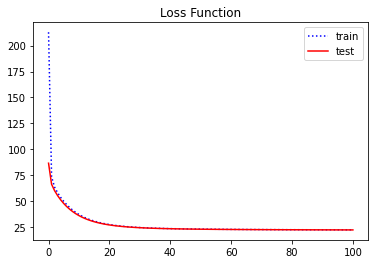

In [37]:
plot_loss(train_loss, test_loss)

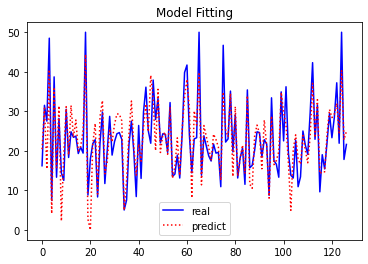

In [38]:
plot_price(predict(x_test, w, b), y_test)

In [39]:
w

array([[ -7.020608  ,   1.6099119 ,  -0.30530256,   1.7631714 ,
         -3.7578838 ,   9.662033  ,   0.46919814,  -6.36998   ,
          3.0136294 ,  -1.32339   ,  -4.916855  ,   1.9499449 ,
        -10.627229  ]], dtype=float32)

In [40]:
b

array([9.553569], dtype=float32)

In [41]:
test_loss[-1]

array([21.952463], dtype=float32)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head(), data.shape

(   Population   Profit
 0      6.1101  17.5920
 1      5.5277   9.1302
 2      8.5186  13.6620
 3      7.0032  11.8540
 4      5.8598   6.8233,
 (97, 2))

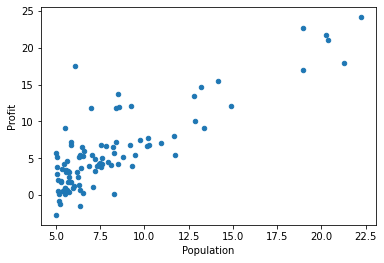

In [48]:
data.plot(kind='scatter', x='Population', y='Profit')
plt.show()

In [86]:
def compute_cost(X, Y, W):
    return np.sum(np.power(((X * W.T) - Y), 2)) / len(X)


In [113]:
def batch_gradient_descent(X, Y, W, alpha, iters):
    tmp = np.matrix(np.zeros(W.shape))
    parameters = int(W.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * W.T) - Y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            tmp[0,j] = W[0,j] - ((alpha / len(X)) * np.sum(term))
        W = tmp
        cost[i] = compute_cost(X, Y, W)
    return W, cost


        

In [104]:
data.insert(0, 'One', 1)
data

ValueError: cannot insert One, already exists

In [105]:
cols = data.shape[1]
X = data.iloc[:, 0: -1]
Y = data.iloc[:,  -1: ]
X.shape, Y.shape

((97, 2), (97, 1))

In [106]:
X, Y

(    One  Population
 0     1      6.1101
 1     1      5.5277
 2     1      8.5186
 3     1      7.0032
 4     1      5.8598
 ..  ...         ...
 92    1      5.8707
 93    1      5.3054
 94    1      8.2934
 95    1     13.3940
 96    1      5.4369
 
 [97 rows x 2 columns],
       Profit
 0   17.59200
 1    9.13020
 2   13.66200
 3   11.85400
 4    6.82330
 ..       ...
 92   7.20290
 93   1.98690
 94   0.14454
 95   9.05510
 96   0.61705
 
 [97 rows x 1 columns])

In [107]:
X = np.matrix(X.values)
Y = np.matrix(Y.values)
X, Y

(matrix([[ 1.    ,  6.1101],
         [ 1.    ,  5.5277],
         [ 1.    ,  8.5186],
         [ 1.    ,  7.0032],
         [ 1.    ,  5.8598],
         [ 1.    ,  8.3829],
         [ 1.    ,  7.4764],
         [ 1.    ,  8.5781],
         [ 1.    ,  6.4862],
         [ 1.    ,  5.0546],
         [ 1.    ,  5.7107],
         [ 1.    , 14.164 ],
         [ 1.    ,  5.734 ],
         [ 1.    ,  8.4084],
         [ 1.    ,  5.6407],
         [ 1.    ,  5.3794],
         [ 1.    ,  6.3654],
         [ 1.    ,  5.1301],
         [ 1.    ,  6.4296],
         [ 1.    ,  7.0708],
         [ 1.    ,  6.1891],
         [ 1.    , 20.27  ],
         [ 1.    ,  5.4901],
         [ 1.    ,  6.3261],
         [ 1.    ,  5.5649],
         [ 1.    , 18.945 ],
         [ 1.    , 12.828 ],
         [ 1.    , 10.957 ],
         [ 1.    , 13.176 ],
         [ 1.    , 22.203 ],
         [ 1.    ,  5.2524],
         [ 1.    ,  6.5894],
         [ 1.    ,  9.2482],
         [ 1.    ,  5.8918],
         [ 1. 

In [108]:
X.shape, Y.shape

((97, 2), (97, 1))

In [109]:
W = np.matrix(np.zeros((1, X.shape[1])))
W, W.shape

(matrix([[0., 0.]]), (1, 2))

In [110]:
compute_cost(X, Y, W)

64.14546775491135

In [116]:
alpha = 0.01
iters = 10000


In [117]:
g, cost = batch_gradient_descent(X, Y, W, alpha, iters)
g

matrix([[-3.89578082,  1.19303364]])

In [118]:
compute_cost(X, Y, g)

8.953942751950358

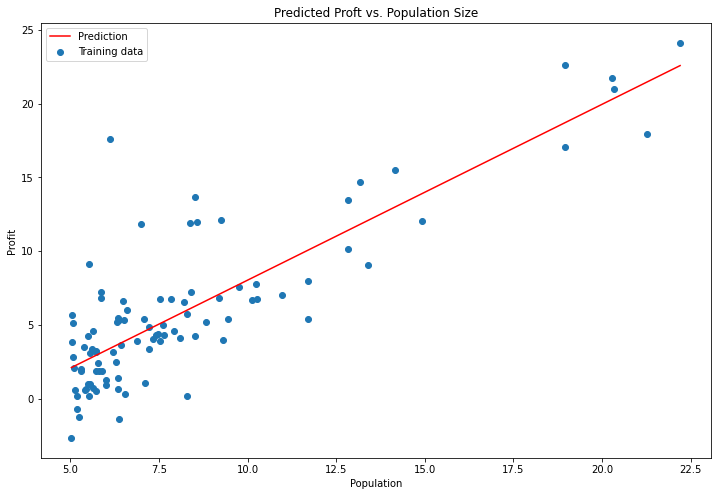

In [119]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0,1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Proft vs. Population Size')
plt.show()

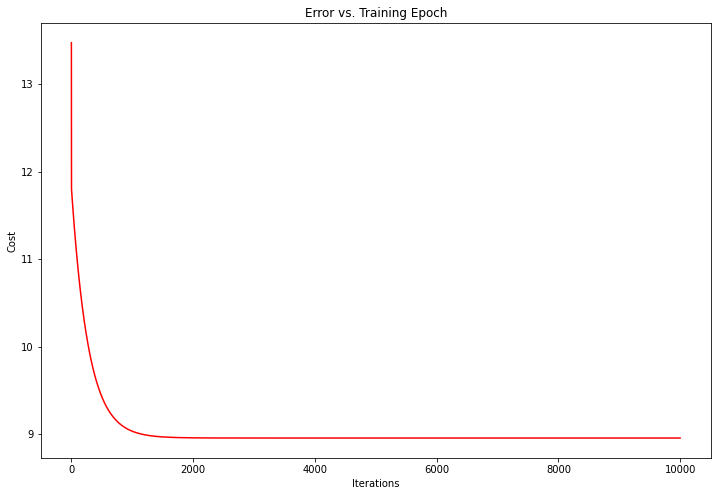

In [120]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()